# Final Project Submission

**Student Name:** Allan Kiplagat  
**Student Pace:** Remote Full-time  
**Date:** [Enter Date]  
**Instructor Name:** [Enter Instructor Name]  
**Blog Post URL:** [Enter Blog Post URL]



For this investigation, I will examine a dataset containing details about police-reported stops conducted under the legal framework of Terry v. Ohio, 392 U.S. 1 (1968). This dataset will serve as the basis for a classification analysis aimed at predicting whether an arrest occurred as the final outcome of a Terry stop conducted by the police. In Terry stops, officers detain individuals based on a "reasonable suspicion" that they may be involved in criminal activity.

The workflow will follow the OSEMN data science process framework outlined as follows:

Obtain: Import the dataset, conduct an initial exploration, and gather all necessary information and resources.
Scrub: Pre-process and clean the data to prepare it for analysis. This may involve converting to appropriate data types, removing unnecessary data or columns, and reformatting data as needed.
Explore: Dive into the data through analyses and visualizations to gain deeper insights into the patterns and trends present in the dataset.
Model: Develop and train a suitable model tailored to the dataset. Fine-tune and validate the model to ensure it accurately captures the underlying patterns in the data.
Interpret: Examine the results of the model and assess their implications. Communicate these findings effectively to relevant stakeholders to ensure they understand the conclusions drawn from the analysis.

<h1>Section 1</h1>
Importing the tonnes of libraries necessary

In [20]:
# Standard Libraries
import warnings
import itertools
from datetime import datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Machine Learning & Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import DataConversionWarning

# Setting styles and ignoring warnings
sns.set(style='white')
plt.style.use("ggplot")
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')
%matplotlib inline


I opted to use google drive to host the csv file so that I can just call the url endpoint

In [21]:
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1d2ur0h9lUlIrL5pnEAgBwDLTYoHrdm81' )
df.head()



,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,26 - 35,33946835189,20220000130414,33946824861,Field Contact,-,7482,1979,M,White,...,02:39:36.0000000,VICE - PROSTITUTION,VICE - PROSTITUTION,ONVIEW,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1
1,-,-1,20170000005258,342036,Field Contact,NaN,6355,1970,F,White,...,06:17:00.0000000,-,-,-,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-
2,26 - 35,7733349602,20190000263182,8628041748,Arrest,-,6262,1973,M,White,...,06:24:25.0000000,"SUSPICIOUS PERSON, VEHICLE, OR INCIDENT",--PROWLER - TRESPASS,911,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2
3,36 - 45,-1,20160000005118,217915,Field Contact,NaN,5803,1971,M,American Indian/Alaska Native,...,16:38:00.0000000,-,-,-,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3
4,46 - 55,-1,20150000227032,60297,Offense Report,Lethal Cutting Instrument,6355,1970,F,White,...,08:55:00.0000000,DISTURBANCE,"--WEAPON,PERSON WITH - OTHER WEAPON",911,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1


Cleaning our data to be fit for EDA and modelling

In [4]:
# explore our dataset further

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60102 entries, 0 to 60101
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         60102 non-null  object
 1   Subject ID                60102 non-null  int64 
 2   GO / SC Num               60102 non-null  int64 
 3   Terry Stop ID             60102 non-null  int64 
 4   Stop Resolution           60102 non-null  object
 5   Weapon Type               27537 non-null  object
 6   Officer ID                60102 non-null  object
 7   Officer YOB               60102 non-null  int64 
 8   Officer Gender            60102 non-null  object
 9   Officer Race              60102 non-null  object
 10  Subject Perceived Race    60102 non-null  object
 11  Subject Perceived Gender  60102 non-null  object
 12  Reported Date             60102 non-null  object
 13  Reported Time             60102 non-null  object
 14  Initial Call Type     

In [22]:
df.describe()

,Subject ID,GO / SC Num,Terry Stop ID,Officer YOB
count,6.010200e+04,6.010200e+04,6.010200e+04,60102.000000
mean,6.867083e+09,2.018584e+13,1.148222e+10,1983.999917
std,1.204292e+10,8.612461e+10,1.674581e+10,9.475162
min,-8.000000e+00,-1.000000e+00,2.802000e+04,1900.000000
25%,-1.000000e+00,2.017000e+13,2.347038e+05,1979.000000
50%,-1.000000e+00,2.018000e+13,5.026000e+05,1986.000000
75%,7.747701e+09,2.020000e+13,1.802688e+10,1991.000000
max,5.656557e+10,2.024000e+13,5.656558e+10,2002.000000


In [23]:
# Check for null values:
print('row----- Column---- :',df.shape,'\n')
print(df.isna().sum())

row----- Column---- : (60102, 23) 

Subject Age Group               0
Subject ID                      0
GO / SC Num                     0
Terry Stop ID                   0
Stop Resolution                 0
Weapon Type                 32565
Officer ID                      0
Officer YOB                     0
Officer Gender                  0
Officer Race                    0
Subject Perceived Race          0
Subject Perceived Gender        0
Reported Date                   0
Reported Time                   0
Initial Call Type               0
Final Call Type                 0
Call Type                       0
Officer Squad                 557
Arrest Flag                     0
Frisk Flag                      0
Precinct                        0
Sector                          0
Beat                            0
dtype: int64


In [24]:
# Update the Stop Resolution column to binary 0 or 1 Arrested or not arrested
df['Stop Resolution'] = df['Stop Resolution'].map({'Arrest': 1, 'Field Contact': 0,'Offense Report': 0,
                                                   'Referred for Prosecution': 0,'Citation / Infraction': 0})
df['Stop Resolution'].value_counts()

Stop Resolution
0    45473
1    14629
Name: count, dtype: int64

In [25]:
# Convert the 'Reported Date' column to datetime format
df['Reported Date'] = pd.to_datetime(df['Reported Date'])

# Create a dictionary for mapping month numbers to month names
month_mapping = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Add a new column for the month name
df['Month'] = df['Reported Date'].dt.month.map(month_mapping)

# Add new columns for the day and year
df['Day'] = df['Reported Date'].dt.day
df['Year'] = df['Reported Date'].dt.year


In [26]:
# Create a dictionary to map weapon types to categories
weapon_mapping = {
    'Lethal Cutting Instrument': 'Non-Firearm', 
    'Knife/Cutting/Stabbing Instrument': 'Non-Firearm',
    'Club, Blackjack, Brass Knuckles': 'Non-Firearm',
    'Blunt Object/Striking Implement': 'Non-Firearm',
    'Mace/Pepper Spray': 'Non-Firearm', 
    'Club': 'Non-Firearm',
    'Taser/Stun Gun': 'Non-Firearm', 
    'Blackjack': 'Non-Firearm',
    'Brass Knuckles': 'Non-Firearm', 
    'Fire/Incendiary Device': 'Non-Firearm',
    'Handgun': 'Firearm',
    'Firearm Other': 'Firearm',
    'Firearm (unk type)': 'Firearm',
    'Firearm': 'Firearm',
    
    'Other Firearm': 'Firearm', 
    'Rifle': 'Firearm',
    'Shotgun': 'Firearm',
    'Automatic Handgun': 'Firearm',
    'None': 'None',
    '-': 'None',
    'None/Not Applicable': 'None'
}

# Map the weapon types to the categories
df['Weapon Type'] = df['Weapon Type'].map(weapon_mapping)


In [27]:
# Change Officer year of birth to give the officer age:
df['Officer Age'] = 2020-df['Officer YOB']

In [28]:
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat,Month,Day,Year,Officer Age
0,26 - 35,33946835189,20220000130414,33946824861,0,None,7482,1979,M,White,...,WEST PCT 3RD W - MARY - PLATOON 1,N,N,West,K,K1,May,24,2022,41
1,-,-1,20170000005258,342036,0,NaN,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,-,-,-,November,19,2017,50
2,26 - 35,7733349602,20190000263182,8628041748,1,None,6262,1973,M,White,...,SOUTHWEST PCT 1ST W - FRANK - PLATOON 2,Y,N,Southwest,F,F2,July,18,2019,47
3,36 - 45,-1,20160000005118,217915,0,NaN,5803,1971,M,American Indian/Alaska Native,...,WEST PCT 2ND W - DAVID BEATS,N,N,North,U,U3,December,4,2016,49
4,46 - 55,-1,20150000227032,60297,0,Non-Firearm,6355,1970,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,Y,East,E,E1,July,4,2015,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,7727744717,20190000194493,8252118453,0,None,7717,1991,F,White,...,SOUTH PCT 3RD W - SAM - PLATOON 2,N,Y,South,S,S1,May,30,2019,29
60098,36 - 45,8331727148,20200000160213,13172913355,1,None,7758,1987,M,White,...,EAST PCT 2ND W - BEATS,Y,N,West,M,M3,May,15,2020,33
60099,26 - 35,20176905289,20210000329258,30544207813,1,None,8486,1992,M,Asian,...,SOUTHWEST PCT 2ND W - FRANK - PLATOON 2,Y,N,-,-,-,December,14,2021,28
60100,26 - 35,-1,20190000112517,546819,1,NaN,8557,1992,F,White,...,EAST PCT 1ST W - E/G RELIEF (CHARLIE),N,N,East,E,E1,March,30,2019,28


In [29]:
# Drop columns that we are not going to need:
df.drop(columns=['Subject ID','GO / SC Num','Officer ID','Officer YOB','Officer Race',
                'Subject Perceived Gender','Subject Perceived Race','Reported Date','Reported Time','Call Type',
                'Officer Squad', 'Sector','Beat','Initial Call Type','Final Call Type','Day'],axis=1, inplace=True)
# See what our final dataset looks like
df.head()

df 

,Subject Age Group,Terry Stop ID,Stop Resolution,Weapon Type,Officer Gender,Arrest Flag,Frisk Flag,Precinct,Month,Year,Officer Age
0,26 - 35,33946824861,0,None,M,N,N,West,May,2022,41
1,-,342036,0,NaN,F,N,N,-,November,2017,50
2,26 - 35,8628041748,1,None,M,Y,N,Southwest,July,2019,47
3,36 - 45,217915,0,NaN,M,N,N,North,December,2016,49
4,46 - 55,60297,0,Non-Firearm,F,N,Y,East,July,2015,50
...,...,...,...,...,...,...,...,...,...,...,...
60097,46 - 55,8252118453,0,None,F,N,Y,South,May,2019,29
60098,36 - 45,13172913355,1,None,M,Y,N,West,May,2020,33
60099,26 - 35,30544207813,1,None,M,Y,N,-,December,2021,28
60100,26 - 35,546819,1,NaN,F,N,N,East,March,2019,28


<h1>Exploring further our data</h1>

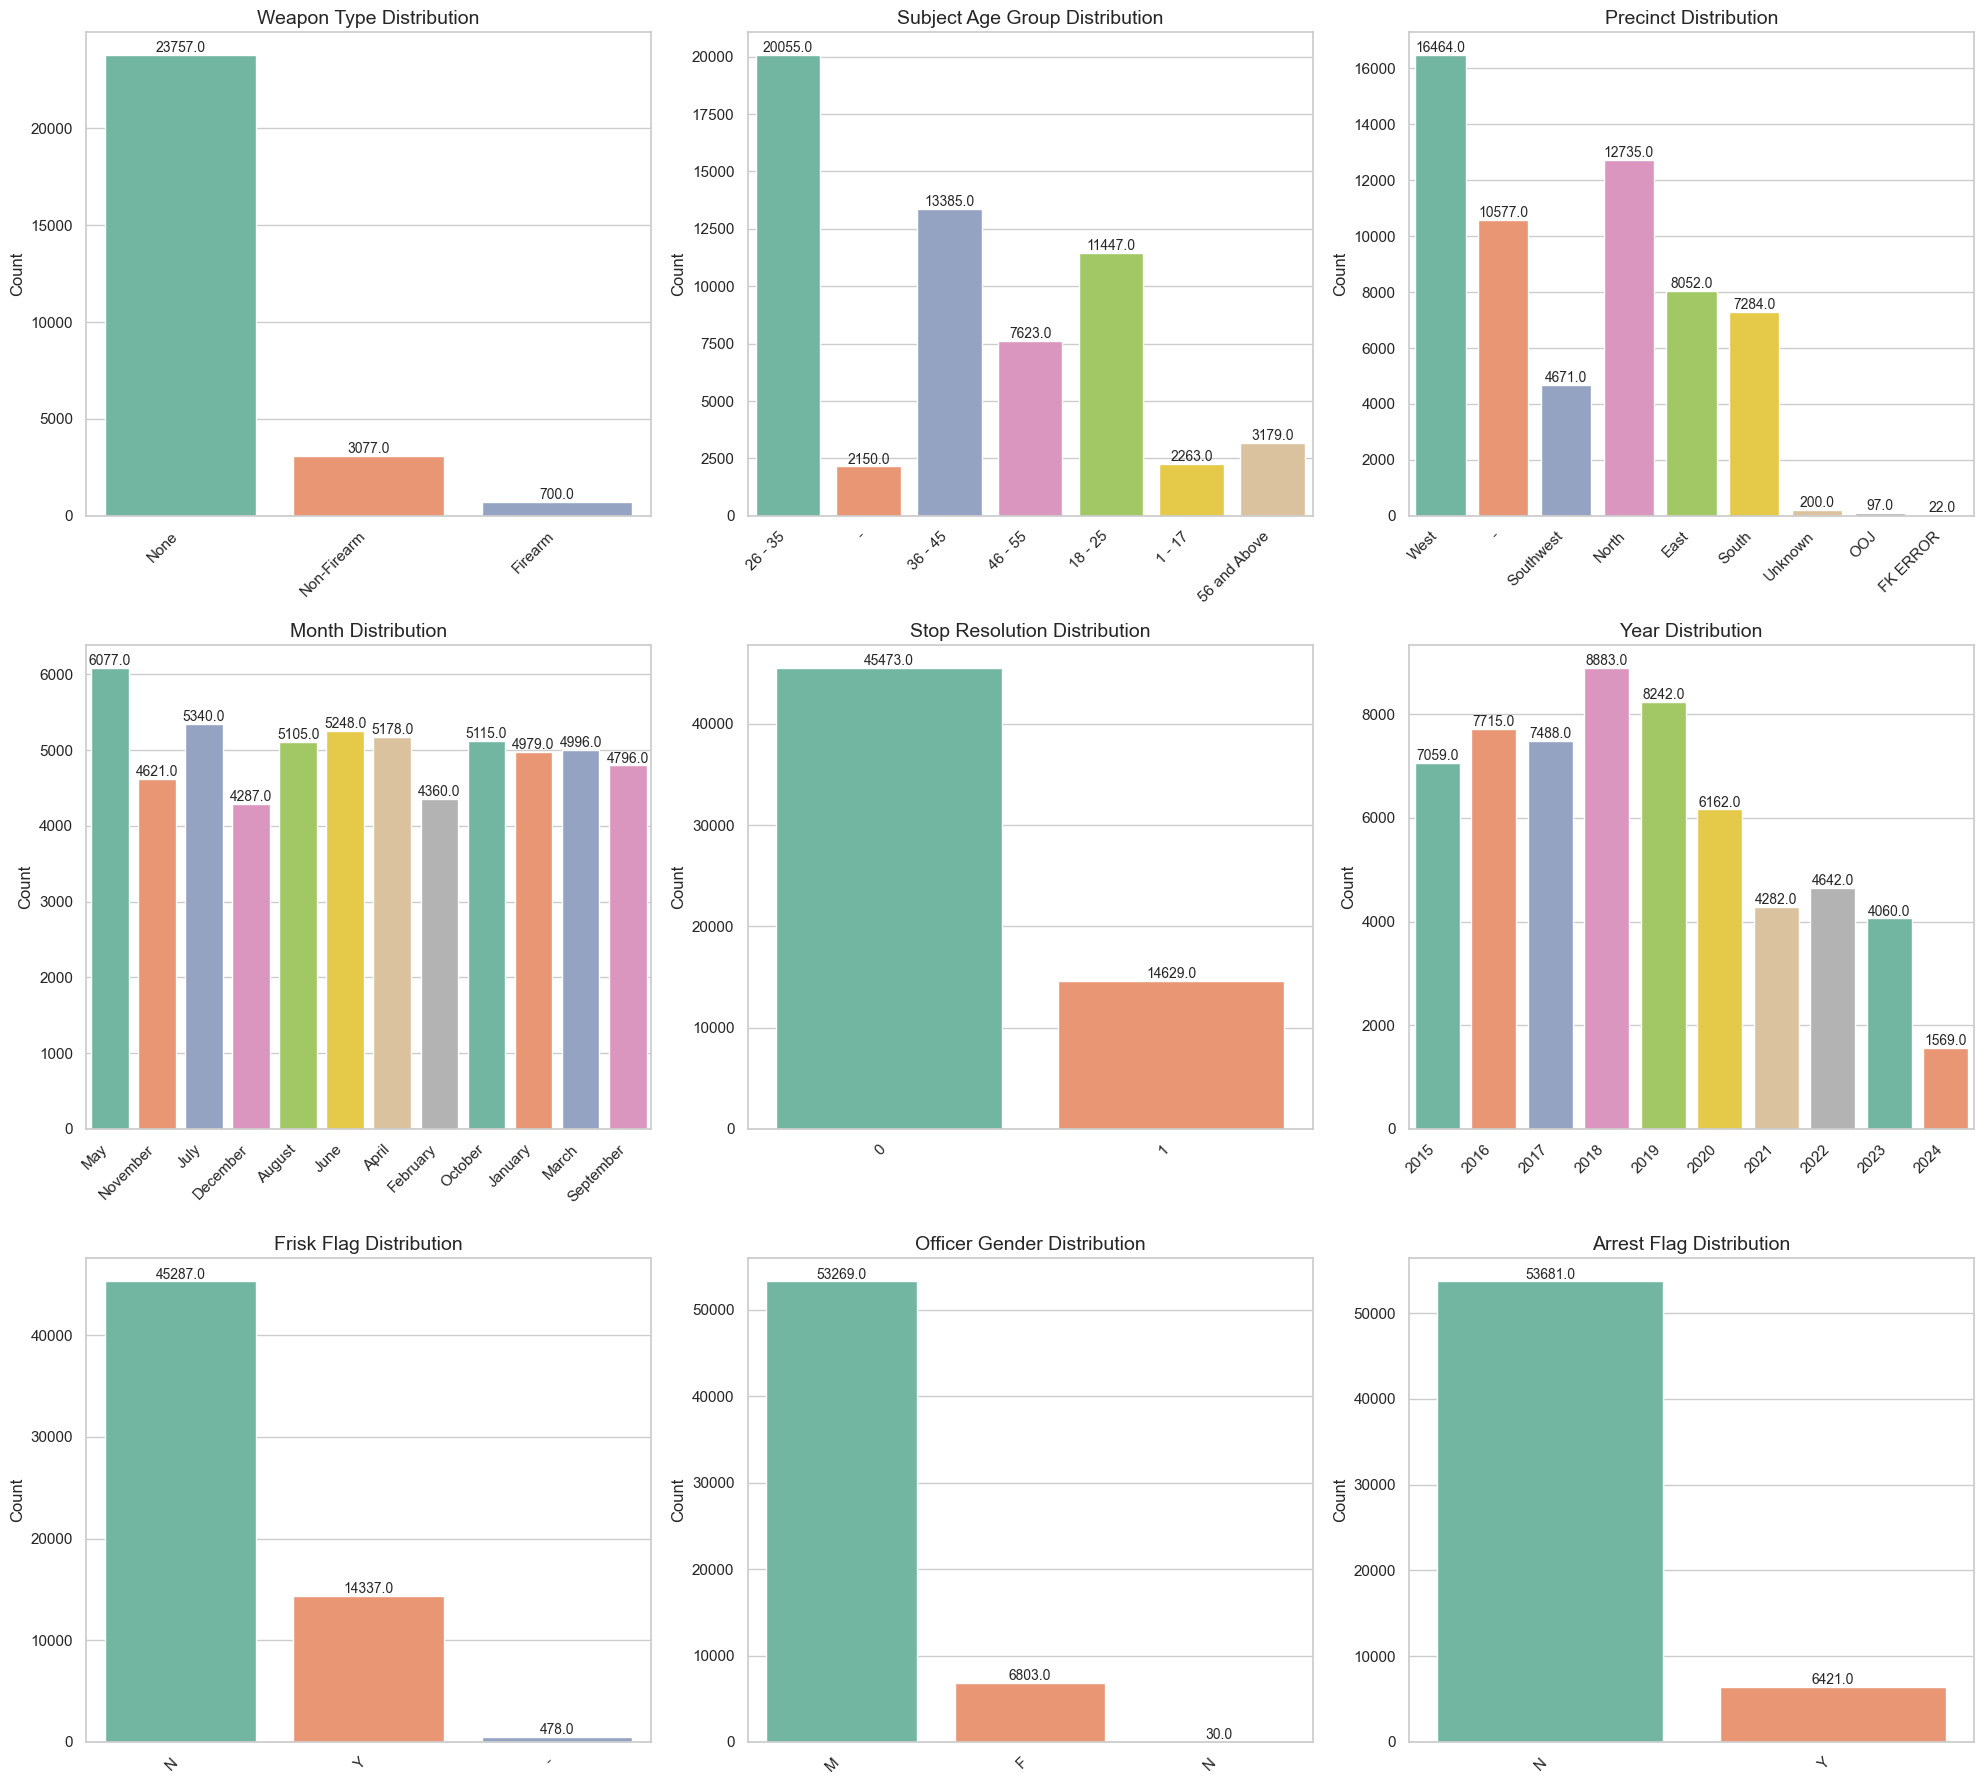

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style and color palette
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Create the figure and define the size
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# List of columns to plot and their titles, reshuffled
columns = [
    ('Weapon Type', 'Weapon Type Distribution'),
    ('Subject Age Group', 'Subject Age Group Distribution'),
    ('Precinct', 'Precinct Distribution'),
    ('Month', 'Month Distribution'),
    ('Stop Resolution', 'Stop Resolution Distribution'),
    ('Year', 'Year Distribution'),
    ('Frisk Flag', 'Frisk Flag Distribution'),
    ('Officer Gender', 'Officer Gender Distribution'),
    ('Arrest Flag', 'Arrest Flag Distribution')
]

# Plot each column in its own subplot
for ax, (col, title) in zip(axes.flatten(), columns):
    plot = sns.countplot(data=df, x=col, palette=palette, ax=ax)
    ax.set_title(title, fontsize=14)
    ax.set_xlabel('')
    ax.set_ylabel('Count', fontsize=12)
    
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    
    # Annotate bars with counts
    for p in plot.patches:
        height = p.get_height()
        plot.annotate(f'{height}', 
                      (p.get_x() + p.get_width() / 2., height), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points',
                      fontsize=10)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


14629


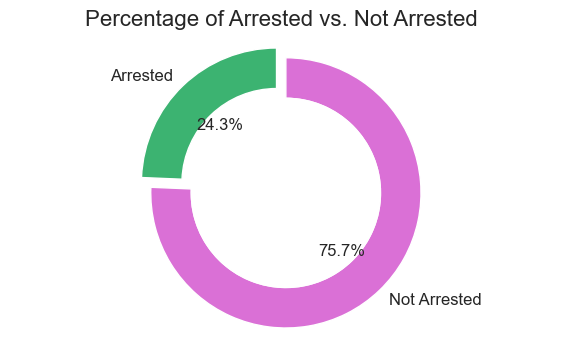

In [32]:
import matplotlib.pyplot as plt

# Calculate the sizes for arrested and not arrested
arrested_count = df['Stop Resolution'].sum()
print(arrested_count)
total_count = len(df['Stop Resolution'])
not_arrested_count = total_count - arrested_count

# Calculate percentages
arrested_percent = (arrested_count / total_count) * 100
not_arrested_percent = (not_arrested_count / total_count) * 100

# Define data for the donut plot
sizes = [arrested_percent, not_arrested_percent]
labels = ['Arrested', 'Not Arrested']
colors = ['mediumseagreen', 'orchid']
explode = (0.1, 0)

# Create the donut plot
fig, ax = plt.subplots(figsize=(7, 4))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3), textprops={'fontsize': 12})

# Add a circle at the center to transform it into a donut plot
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')  
plt.title('Percentage of Arrested vs. Not Arrested', fontsize=16)
plt.show()




Modelling part


In [34]:
# Split into train and test sets:
X = df.loc[:, ['Subject Age Group', 'Weapon Type', 'Arrest Flag', 'Frisk Flag','Precinct','Month',
               'Year','Officer Age', 'Officer Gender']]
y = df.loc[:, 'Stop Resolution']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [35]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Instantiate and fit the OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(X_train)

# Transform the training and testing data
X_train_ohe = ohe.transform(X_train).toarray()
X_test_ohe = ohe.transform(X_test).toarray()

# Retrieve feature names after one-hot encoding
feature_names = ohe.get_feature_names_out(input_features=X_train.columns)

# Create DataFrames for both training and testing data
ohe_df_train = pd.DataFrame(X_train_ohe, columns=feature_names)
ohe_df_test = pd.DataFrame(X_test_ohe, columns=feature_names)

# Concatenate the DataFrames
ohe_df = pd.concat([ohe_df_train, ohe_df_test], ignore_index=True)


In [36]:
# Define Confusion Matrix:
def confusion_matrix_plot(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''This function will create a confusion matrix chart which shows the accuracy breakdown of the given model.
    Inputs:
    cm: confusion matrix function for tested and predicted y values
    classes: variables to identify for each class (0 or 1)
    normalize: if True will normalize the data, if False will not normalize the data
    title: title of the chart
    cmap: colors to plot
    '''
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    # Add title and labels:
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    # Add axis scales and tick marks:
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    # Add labels to each cell:
    thresh = cm.max() / 2.
    # Iterate through confusion matrix and append labels to the plot:
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')
        
    # Add legend:
    plt.colorbar()
    plt.show()
    
# Use Arrested and Not Arrested for 0 and 1 classes 
class_names = ['Arrested','Not Arrested']

k nearest

In [37]:
# Find optimial k value:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    '''This function will determine which k value is optimal to use for knn classification by selecting the k value
    with the highest overall accuracy score.
    Inputs:
    X_train, y_train, X_test, y_test: tran and test set values
    min_k: minimum value to try for k
    max_k: maximum value to try for k
        '''
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1,2):
        knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        accuracy = accuracy_score(y_test, preds)
        if accuracy > best_score:
            best_k = k
            best_score = accuracy
    
    print("Best Value for k: {}".format(best_k))
    print("Accuracy Score: {}".format(best_score))
    
print(find_best_k(X_train_ohe, y_train, X_test_ohe, y_test))

Best Value for k: 25
Accuracy Score: 0.8671177416671288
None


KNN Accuracy:  86.71177416671289 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13753
           1       0.89      0.50      0.64      4278

    accuracy                           0.87     18031
   macro avg       0.88      0.74      0.78     18031
weighted avg       0.87      0.87      0.85     18031



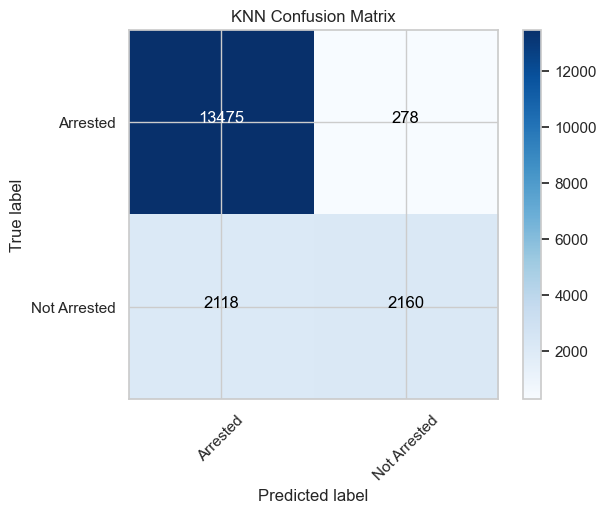

In [48]:
# Create the classifier, fit it on the training data and make predictions on the test set:
knn = KNeighborsClassifier(n_neighbors = 25, algorithm='brute')
knn.fit(X_train_ohe, y_train)
y_pred = knn.predict(X_test_ohe)

# Check the Accuracy:
print('KNN Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Check the AUC:

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for KNN:
cm_knn = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_knn, classes=class_names, title='KNN Confusion Matrix')

logistic regression

Logistic Regression Accuracy:  86.58421607231989 %
              precision    recall  f1-score   support

           0       0.86      0.98      0.92     13753
           1       0.90      0.49      0.63      4278

    accuracy                           0.87     18031
   macro avg       0.88      0.73      0.78     18031
weighted avg       0.87      0.87      0.85     18031



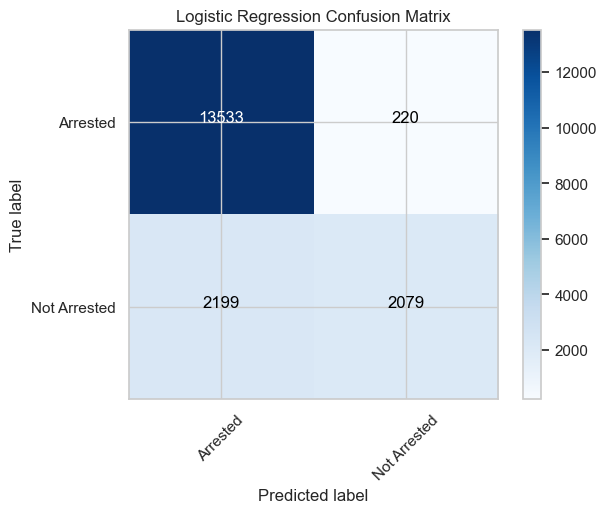

In [38]:


# Create the classifier, fit it on the training data and make predictions on the test set:
logreg = LogisticRegression()
logreg.fit(X_train_ohe, y_train)
y_pred = logreg.predict(X_test_ohe)

# Check the Accuracy:
print('Logistic Regression Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Logistic Regression:
cm_LR = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_LR, classes=class_names, title='Logistic Regression Confusion Matrix')

random forest

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid with reduced ranges
param_grid = {
    'n_estimators': [80, 100, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None],
    'max_features': [None, 'sqrt', 'log2'],  # Reduced range
    'min_samples_split': [2, 5]  # Reduced range
}

# Instantiate the RandomForestClassifier
forest = RandomForestClassifier()

# Perform grid search with parallel processing and fewer cross-validation folds
forest_grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs=-1)

# Fit the grid search to the data
forest_grid_search.fit(X_train_ohe, y_train)

# Print the best parameters found
print("Best parameters found:", forest_grid_search.best_params_)


KeyboardInterrupt: 

Random Forest Accuracy:  87.34956463867783 %
              precision    recall  f1-score   support

           0       0.88      0.97      0.92     13753
           1       0.84      0.58      0.68      4278

    accuracy                           0.87     18031
   macro avg       0.86      0.77      0.80     18031
weighted avg       0.87      0.87      0.86     18031



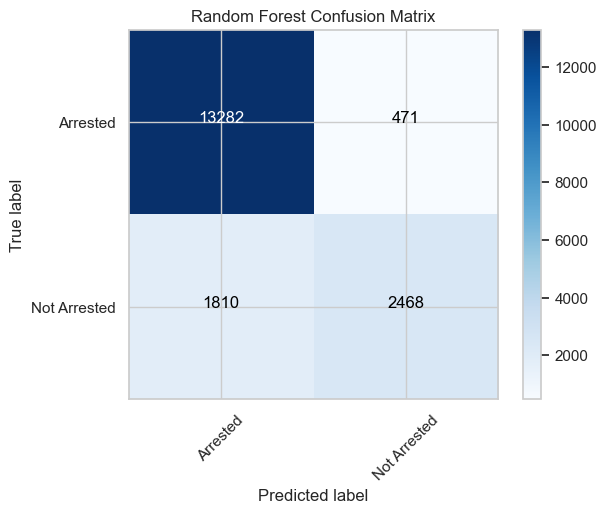

In [52]:
# Create the classifier, fit it on the training data and make predictions on the test set:
rforest = RandomForestClassifier(n_estimators=80, criterion = 'gini',max_depth=None, max_features=5, 
                                 min_samples_split=5)
rforest.fit(X_train_ohe, y_train)
y_pred = rforest.predict(X_test_ohe)

# Check the Accuracy:
print('Random Forest Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')

# Print classification report:
print(classification_report(y_test, y_pred))

# Confusion Matrix for Random Forest:
cm_forest = confusion_matrix(y_test,y_pred)
confusion_matrix_plot(cm_forest, classes=class_names, title='Random Forest Confusion Matrix')

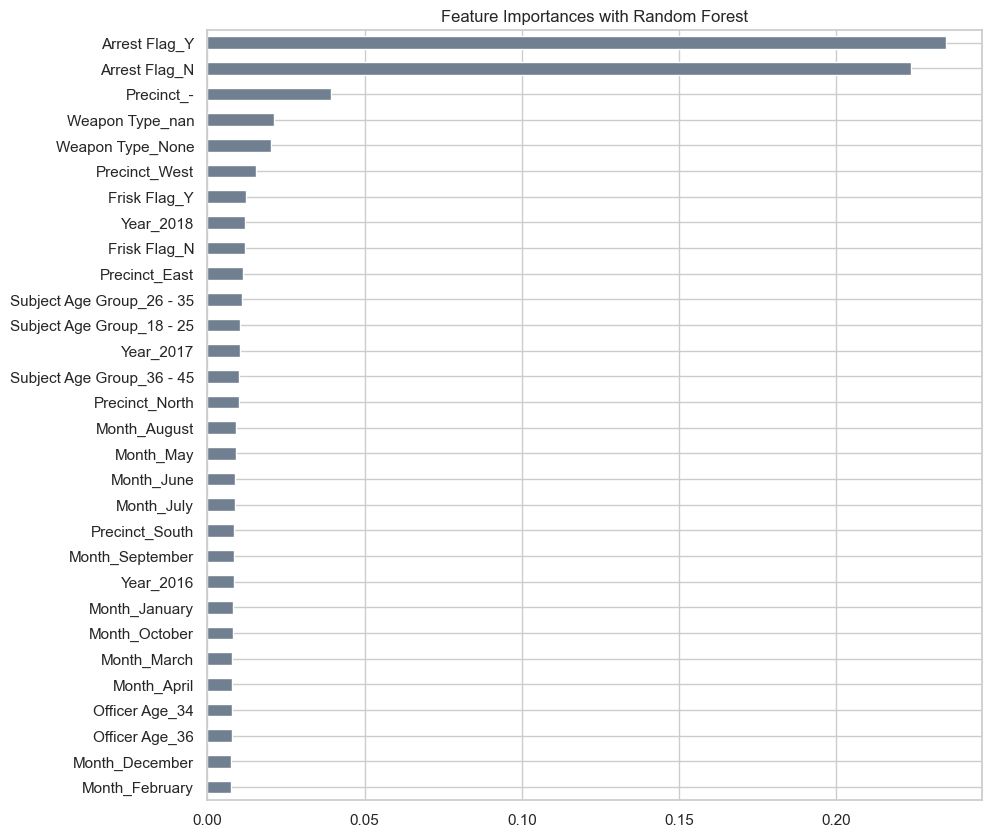

In [53]:
# Plot the 30 most influential features based on Random Forest model:
influential_features = pd.Series(rforest.feature_importances_, index=ohe_df.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='slategrey', figsize=(10,10))
plt.title('Feature Importances with Random Forest');

<h1>Outro</h1>

In [ ]:
outro